In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$ L_{log}(X,\vec{y},\vec{w}) = \sum\limits_{i=1}^n(-y_i \mkern 2mu log_e \mkern 5mu \sigma(\vec{w}^T \vec{x_i}) - (1-y_i) \mkern 2mu log_e \mkern 5mu (1 - \sigma(\vec{w}^T \vec{x_i})) ) \rightarrow min $

In [8]:
class LogisticRegression:
  def __init__(self, 
               C: float=1.0,
               lr: float=1e-2,
               num_steps: int=5000):
    self.C = C
    self.lr = lr
    self.num_steps = num_steps
    self.weights = None
    self.bias = random.uniform(0.01,1)

  def logloss_1_0(self, values, targets, weights):
    n = targets.shape[0]
    return (-1/n)*(np.sum(targets*np.log(self.sigmoid(values@weights)) + (1 - targets)*np.log(1 - self.sigmoid(values@weights))))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
 
  def weights_initialisation(self, nomber_of_weights):
    weights = []
    for weight in range(nomber_of_weights):
      weights.append(random.uniform(0.01,1))
    return np.array(weights)

  def math_gradient(self,weigts, bias, values, targets):
    n = values.shape[0]
    sigmoid = self.sigmoid(np.dot(values,weigts)+bias)
    loss = (-1/n)*(np.sum((targets*np.log(sigmoid)) + ((1-targets)*(np.log(1-sigmoid)))))

    dw = (1/n)*(np.dot((sigmoid-targets),values))
    db = (1/n)*(np.sum(sigmoid-targets))

    return dw, db, loss

  def lim_gradient(self,values,targets, weights, delta_w = 0.0001):
    range_weights = len(weights)
    derivation_values = []
    for weight in range(range_weights):
      new_weights = weights.copy()
      new_weights[weight] += delta_w
      new_derivation = (self.logloss_1_0(values, targets, new_weights) - self.logloss_1_0(values, targets, weights))/delta_w
      derivation_values.append(new_derivation)
    return np.array(derivation_values)    

  def fit(self, values, target_values):
    self.weights = self.weights_initialisation(values.shape[1])
    print('Start weights', self.weights)
    for step in range(self.num_steps):
      dw,db, error = self.math_gradient(self.weights,self.bias,values,target_values)
      self.weights = self.weights - (self.lr * (dw.T))
      self.bias = self.bias - (self.lr * db)
    print('End weights:' ,np.append(self.bias,self.weights))

  def ffit(self, values, target_values):
    self.weights = self.weights_initialisation(values.shape[1] + 1)
    print('Start weights', self.weights)
    ones = np.ones(values.shape[0]).reshape((values.shape[0], 1))
    values = np.concatenate([ones,values], axis = 1)
    for step in range(self.num_steps):
      self.weights -= self.lr*self.lim_gradient(values, target_values,self.weights)
    print('End weights:' , self.weights)

  def predict(self, values):
    final_pred = self.sigmoid(np.dot(self.weights,values.T)+self.bias)
    answers = []
    for i in final_pred:
      if i >=0.5:
        answers.append(1)
      else:
        answers.append(0)
    print(final_pred)
    return np.array(answers)

  def fpredict(self, values):
    ones = np.ones(values.shape[0]).reshape((values.shape[0], 1))
    values = np.concatenate([ones,values], axis = 1) 
    final_pred = self.sigmoid(np.dot(self.weights,values.T))
    answers = []
    for i in final_pred:
      if i >=0.5:
        answers.append(1)
      else:
        answers.append(0)
    print(final_pred)
    return np.array(answers)


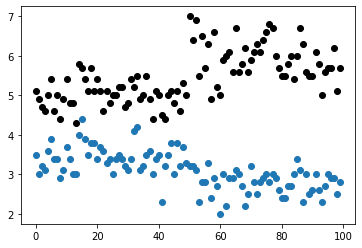

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
values = data.data[:100]
targets = data.target[:100]

X_train, X_test, y_train, y_test = train_test_split(values, targets, test_size=0.2, random_state=42)

plt.plot(values.T[0],'ko')
plt.plot(values.T[1],'o')

In [4]:
%%time
model = LogisticRegression()
model.fit(X_train,y_train)

Start weights [0.46621313 0.57823513 0.74899383 0.65522027]
End weights: [ 0.51681448 -0.80471644 -1.49946587  2.66198684  1.5571975 ]
CPU times: user 350 ms, sys: 687 µs, total: 350 ms
Wall time: 388 ms


In [5]:
print(model.predict(X_test))
print(y_test)

[0.99955081 0.99510389 0.99857362 0.02532576 0.0264793  0.01235816
 0.00364942 0.98688275 0.0062292  0.00818569 0.00836331 0.03156752
 0.99694987 0.00208966 0.99690122 0.00764049 0.99699315 0.99861958
 0.01867495 0.01324268]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [6]:
%%time
model2 = LogisticRegression()
model2.ffit(X_train,y_train)

Start weights [0.76759014 0.48579037 0.26433629 0.2827605  0.52188942]
End weights: [ 0.34785709 -0.56101859 -1.74256758  2.51763705  1.54103746]
CPU times: user 2.91 s, sys: 68.5 ms, total: 2.98 s
Wall time: 3.53 s


In [7]:
print(model2.fpredict(X_test))
print(y_test)

[0.99949093 0.99517086 0.99820357 0.0269689  0.02331268 0.01269959
 0.00340118 0.98715985 0.00640354 0.00833084 0.00875435 0.03196691
 0.99675889 0.00197812 0.99652413 0.00740932 0.99725671 0.99859916
 0.01995851 0.01457877]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
